# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
import joblib

In [273]:
warnings.filterwarnings("ignore", category=FutureWarning)

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [274]:
TEST_SIZE = 0.2
RANDOM_STATE = 21
FIT_INTERCEPT = False
PROBABILITY = True
DTC_MAX_DEPTH = 4
RFC_MAX_DEPTH = 25
RFC_N_ESTIMATORS = 100

In [275]:
df = pd.read_csv('../data/dayofweek.csv', sep=',')
df

,dayofweek,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,uid_user_18,uid_user_19,uid_user_2,uid_user_20,uid_user_21,uid_user_22,uid_user_23,uid_user_24,uid_user_25,uid_user_26,uid_user_27,uid_user_28,uid_user_29,uid_user_3,uid_user_30,uid_user_31,uid_user_4,uid_user_6,uid_user_7,uid_user_8,labname_code_rvw,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,4,-0.788667,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,-0.756764,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,-0.724861,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,-0.692958,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,-0.661055,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,3,-0.533442,0.945382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,3,-0.629151,0.945382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,3,-0.597248,0.945382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,3,-0.565345,0.945382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [276]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [277]:
# Output the shapes of the resulting datasets
print(
    f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}\n"
    f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}"
)

X_train shape: (1348, 43), y_train shape: (1348,)
X_test shape: (338, 43), y_test shape: (338,)


In [278]:
# Check if the distiribution of classes is the same in y and y_train, y_test
print(
  f"y value counts:\n{y.value_counts(normalize=True)}",
  f"y_train value counts:\n{y_train.value_counts(normalize=True)}",
  f"y_test value counts:\n{y_test.value_counts(normalize=True)}",
  sep="\n\n"
)

y value counts:
dayofweek
3    0.234875
6    0.211151
1    0.162515
5    0.160735
2    0.088375
0    0.080664
4    0.061684
Name: proportion, dtype: float64

y_train value counts:
dayofweek
3    0.232196
6    0.212908
1    0.164688
5    0.160237
2    0.092730
0    0.077893
4    0.059347
Name: proportion, dtype: float64

y_test value counts:
dayofweek
3    0.245562
6    0.204142
5    0.162722
1    0.153846
0    0.091716
4    0.071006
2    0.071006
Name: proportion, dtype: float64


In [279]:
# splitting datasets with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

In [280]:
print(
  f"y value counts:\n{y.value_counts(normalize=True)}",
  f"y_train value counts:\n{y_train.value_counts(normalize=True)}",
  f"y_test value counts:\n{y_test.value_counts(normalize=True)}",
  sep="\n\n"
)

y value counts:
dayofweek
3    0.234875
6    0.211151
1    0.162515
5    0.160735
2    0.088375
0    0.080664
4    0.061684
Name: proportion, dtype: float64

y_train value counts:
dayofweek
3    0.234421
6    0.211424
1    0.162463
5    0.160979
2    0.088279
0    0.080861
4    0.061573
Name: proportion, dtype: float64

y_test value counts:
dayofweek
3    0.236686
6    0.210059
1    0.162722
5    0.159763
2    0.088757
0    0.079882
4    0.062130
Name: proportion, dtype: float64


## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [281]:
logreg = LogisticRegression(
  random_state=RANDOM_STATE,
  fit_intercept=FIT_INTERCEPT,
  solver='liblinear', 
)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression accuracy: {accuracy}")

Logistic Regression accuracy: 0.6153846153846154


### b. SVM

In [282]:
svc = OneVsRestClassifier(SVC(kernel='linear', random_state=RANDOM_STATE, probability=PROBABILITY))
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVC accuracy: {accuracy}")

SVC accuracy: 0.6183431952662722


### c. Decision tree

In [283]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=RANDOM_STATE)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree accuracy: {accuracy}")

Decision Tree accuracy: 0.5295857988165681


### d. Random forest

In [284]:
rfc = RandomForestClassifier(n_estimators=RFC_N_ESTIMATORS, max_depth=RFC_MAX_DEPTH, random_state=RANDOM_STATE)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest accuracy: {accuracy}")

Random Forest accuracy: 0.9289940828402367


1. No
2. Random Forest Model showed the largest difference:

    1.0 (obviosly overfit) VS 0.92899

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [285]:
def model_cross_val_score(model, X, y, cv_num=10) -> None:
  scores = cross_val_score(model, X, y, cv=cv_num)
  print(
    f"{model.__class__.__name__} CV scores: \n{scores}",
    f"Mean: {scores.mean()}",
    f"Standard Deviation: {scores.std()}" ,
    sep="\n\n"
  )

In [286]:
model_cross_val_score(logreg, X, y, cv_num=10)

LogisticRegression CV scores: 
[0.22485207 0.4556213  0.49112426 0.59171598 0.64497041 0.68639053
 0.60119048 0.35119048 0.26785714 0.21428571]

Mean: 0.45291983657368284

Standard Deviation: 0.16960708432126997


### b. SVM

In [287]:
model_cross_val_score(svc, X, y, cv_num=10)

OneVsRestClassifier CV scores: 
[0.31360947 0.38461538 0.46153846 0.58579882 0.68639053 0.58579882
 0.53571429 0.30357143 0.28571429 0.2797619 ]

Mean: 0.4422513384051846

Standard Deviation: 0.14139746644132703


### c. Decision tree

In [288]:
model_cross_val_score(dtc, X, y, cv_num=10)

DecisionTreeClassifier CV scores: 
[0.32544379 0.28402367 0.31360947 0.52071006 0.62130178 0.50295858
 0.44642857 0.32738095 0.27380952 0.26785714]

Mean: 0.3883523527754297

Standard Deviation: 0.11835394295385691


### d. Random forest

In [289]:
model_cross_val_score(rfc, X, y, cv_num=10)

RandomForestClassifier CV scores: 
[0.35502959 0.49112426 0.70414201 0.76331361 0.73964497 0.82840237
 0.89880952 0.80952381 0.58333333 0.43452381]

Mean: 0.6607847280924204

Standard Deviation: 0.17462799234675505


## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [290]:
rfc_score = cross_val_score(rfc, X, y, cv=10)
print(
  f"{rfc.__class__.__name__} CV scores: \n{rfc_score}",
  f"Mean: {rfc_score.mean()}",
  f"Standard Deviation: {rfc_score.std()}" ,
  sep="\n\n"
)

RandomForestClassifier CV scores: 
[0.35502959 0.49112426 0.70414201 0.76331361 0.73964497 0.82840237
 0.89880952 0.80952381 0.58333333 0.43452381]

Mean: 0.6607847280924204

Standard Deviation: 0.17462799234675505


In [291]:
accuracy_score(y_test, rfc.predict(X_test))

0.9289940828402367

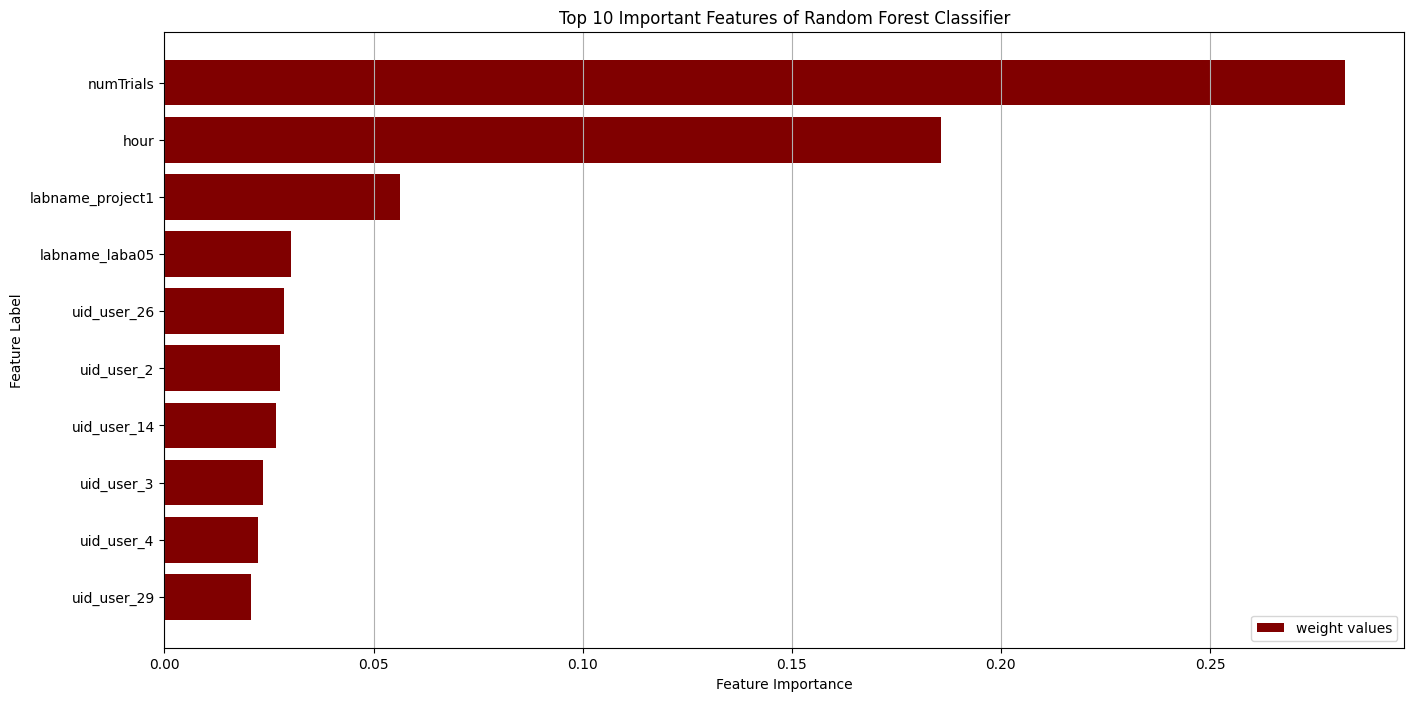

In [292]:
def top_features_plot(coefficients, feature_names, model_name:str, top_n:int=10):
  indices = np.argsort(coefficients)[::-1][:top_n]

  fig = plt.figure(figsize=(16, 8))
  plt.barh(feature_names[indices][::-1], coefficients[indices][::-1], color='maroon')
  plt.xlabel('Feature Importance')
  plt.ylabel('Feature Label') 
  plt.title(f'Top {top_n} Important Features of {model_name}')
  plt.legend(['weight values'])
  plt.grid(axis='x')
  plt.show()


top_features_plot(rfc.feature_importances_, X.columns, model_name="Random Forest Classifier", top_n=10)

In [293]:
joblib.dump(rfc, "../data/rfc_model.pkl")

['../data/rfc_model.pkl']

In [294]:
loaded_model = joblib.load("../data/rfc_model.pkl")

In [295]:
print(f"Loaded model accuracy: {accuracy_score(y_test, loaded_model.predict(X_test))}")


Loaded model accuracy: 0.9289940828402367
